In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
clusteringData = pd.read_csv("../Data/ClusteringDF.csv")

missingValues = clusteringData.isnull().sum()
missingValues

file_name                         0
std_dev                           0
mean_time_diff                    0
median_time_diff                  0
max_peak                          0
median_peak                       0
std_peak                          0
avg_peaks_per_second              0
sum_peak_magnitude                0
percent_time_above_threshold      0
mean_post_peak_magnitude        170
std_dev_post_peak_magnitude     170
dtype: int64

In [26]:
clusteringData.drop(['file_name', 'mean_post_peak_magnitude', 'std_dev_post_peak_magnitude'], axis = 1, inplace= True)

clusteringData.isnull().sum()

std_dev                         0
mean_time_diff                  0
median_time_diff                0
max_peak                        0
median_peak                     0
std_peak                        0
avg_peaks_per_second            0
sum_peak_magnitude              0
percent_time_above_threshold    0
dtype: int64

In [27]:
clusteringData.dtypes

std_dev                         float64
mean_time_diff                  float64
median_time_diff                float64
max_peak                        float64
median_peak                     float64
std_peak                        float64
avg_peaks_per_second            float64
sum_peak_magnitude              float64
percent_time_above_threshold    float64
dtype: object

In [28]:
# Standardize
scaler = StandardScaler()
scaledData = scaler.fit_transform(clusteringData)

In [29]:
# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for 2D visualization
pcaData = pca.fit_transform(scaledData)
pcaDF = pd.DataFrame(data=pcaData, columns=['PCA1', 'PCA2'])

In [30]:
# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # Specify the number of clusters (How many do we want??)
clusters = kmeans.fit_predict(pcaData)
pcaDF['Cluster'] = clusters

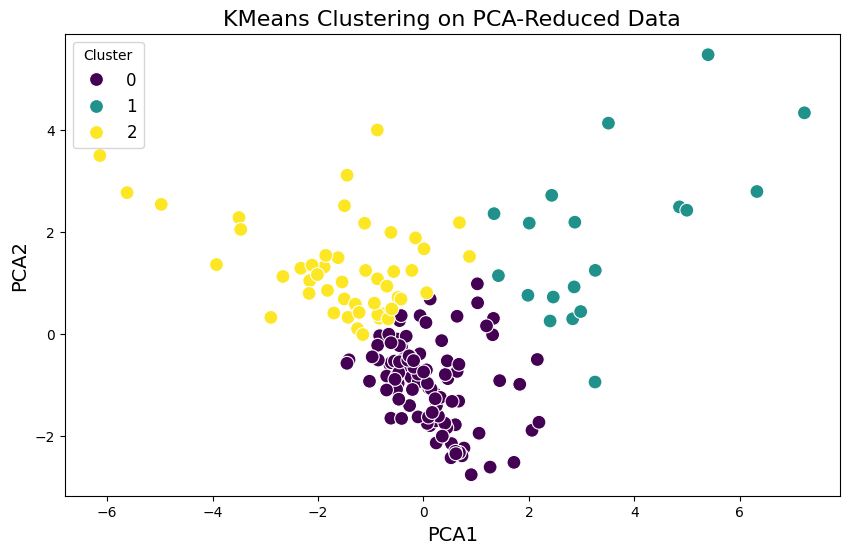

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', 
    y='PCA2', 
    hue='Cluster', 
    data=pcaDF, 
    palette='viridis', 
    s=100
)
plt.title('KMeans Clustering on PCA-Reduced Data', fontsize=16)
plt.xlabel('PCA1', fontsize=14)
plt.ylabel('PCA2', fontsize=14)
plt.legend(title='Cluster', fontsize=12)
plt.show()

In [34]:
# Investigating PCA Components
loading_matrix = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=clusteringData.columns
)

print("PCA Loadings:")
print(loading_matrix)

PCA Loadings:
                                   PC1       PC2
std_dev                       0.332013  0.302188
mean_time_diff                0.424831  0.361379
median_time_diff              0.414477  0.364748
max_peak                     -0.371917  0.427190
median_peak                  -0.191580  0.361194
std_peak                     -0.210652  0.422958
avg_peaks_per_second          0.007918  0.355843
sum_peak_magnitude           -0.372889  0.126469
percent_time_above_threshold -0.423068  0.102867


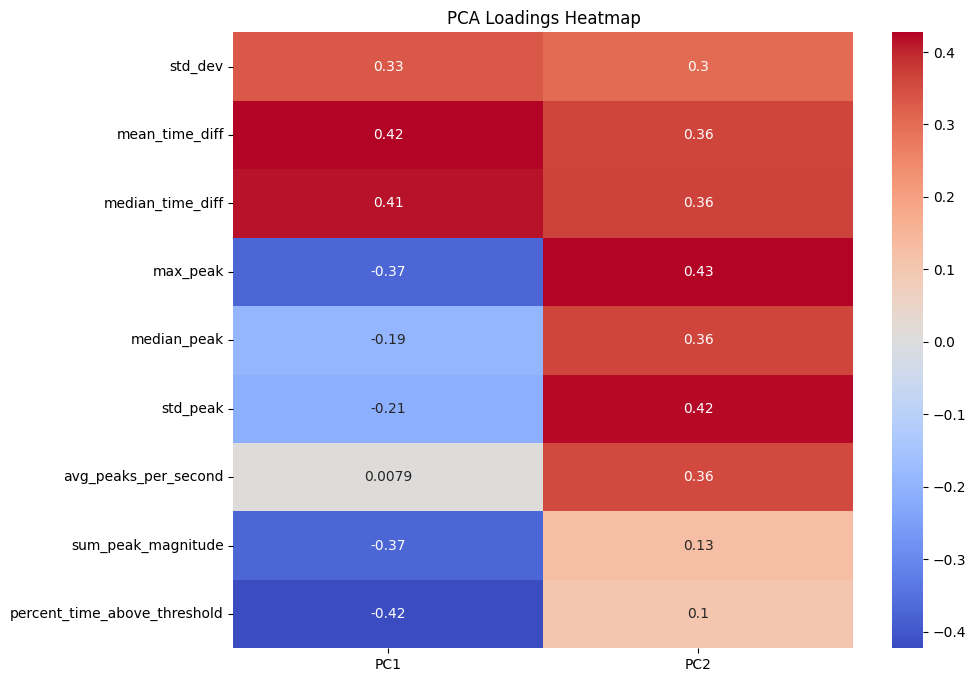

In [35]:
# Visualizing PCA Components
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(loading_matrix, annot=True, cmap='coolwarm')
plt.title("PCA Loadings Heatmap")
plt.show()
